# Aufgabe 1

In [3]:
import torch

# Überprüfen der Verfügbarkeit von CUDA (NVIDIA)
print("CUDA verfügbar:", torch.cuda.is_available())
# Überprüfen der Verfügbarkeit von MPS (Apple Silicon)
print("MPS verfügbar:", torch.backends.mps.is_available())
# CPU Fähigkeiten ausgeben
print("CPU Fähigkeiten:", torch.backends.cpu.get_cpu_capability())


CUDA verfügbar: False
MPS verfügbar: False
CPU Fähigkeiten: AVX2


# Aufgabe 2

Loss at 30 in epoch 0
Loss at 10 in epoch 1
Loss at 15 in epoch 2
Loss at 13 in epoch 3
Loss at 11 in epoch 4
Loss at 11 in epoch 5
Loss at 13 in epoch 6
Loss at 14 in epoch 7
Loss at 12 in epoch 8
Loss at 39 in epoch 9


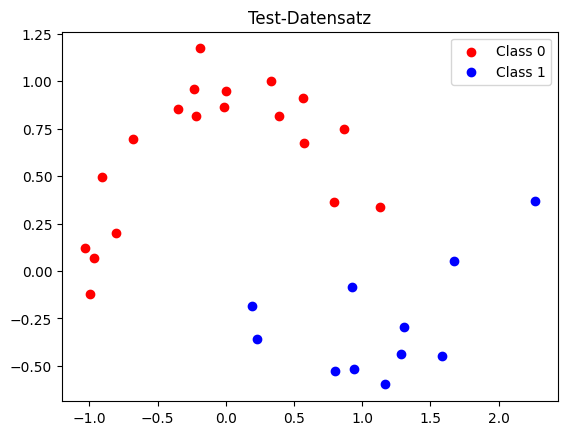

In [4]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

# Heaviside-Funktion
def heaviside(x):
    return torch.where(x >= 0, torch.tensor(1.0), torch.tensor(0.0))

# Verlustfunktion
def perceptron_loss(label, true_label):
    return (label != true_label).sum().item()

# Perzeptron Inferenz
def perceptron_infer(x, params):
    return heaviside(torch.matmul(x, params))

# Optimizer Step
def optimizer_step(x, y, params):
    for i in range(len(y)):
        prediction = heaviside(torch.dot(params, x[i]))
        error = y[i] - prediction
        params += error * x[i]  # Update Rule
    return params

# Hauptprogramm
def main():
    # Generiere den Datensatz
    X, y = make_moons(n_samples=100, noise=0.1, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Konvertiere zu Torch Tensors
    X_train_tensor = torch.FloatTensor(X_train)
    y_train_tensor = torch.FloatTensor(y_train)
    X_test_tensor = torch.FloatTensor(X_test)
    y_test_tensor = torch.FloatTensor(y_test)

    # Initialisiere Gewichte
    params = torch.zeros(X_train_tensor.shape[1], dtype=torch.float32)

    EPOCHS = 10

    # Training des Perzeptrons
    for n in range(EPOCHS):
        y_pred = perceptron_infer(X_train_tensor, params)
        loss = perceptron_loss(y_pred, y_train_tensor)
        print(f"Loss at {loss} in epoch {n}")
        params = optimizer_step(X_train_tensor, y_train_tensor, params)

    # Teste die Vorhersage
    y_test_pred = perceptron_infer(X_test_tensor, params)

    # Visualisierung
    plt.scatter(X_test[y_test_pred == 0][:, 0], X_test[y_test_pred == 0][:, 1], color='red', label='Class 0')
    plt.scatter(X_test[y_test_pred == 1][:, 0], X_test[y_test_pred == 1][:, 1], color='blue', label='Class 1')
    plt.title("Test-Datensatz")
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()
